In [145]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pickle

In [146]:
# Cargar el dataset
file_path = 'data_evaluacion.csv'
data = pd.read_csv(file_path)

In [147]:
data.isna().sum().sort_values()

39               0
State-gov        0
77516            0
Bachelors        0
13               0
Never-married    0
Adm-clerical     0
Not-in-family    0
White            0
Male             0
2174             0
0                0
40               0
United-States    0
<=50K            0
dtype: int64

In [148]:
data = pd.read_csv(file_path, header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])


In [149]:
# Definir mapeos para las variables categóricas
workclass_map = {'Private': 0, 'Self-emp-not-inc': 1, 'Self-emp-inc': 2, 'Federal-gov': 3, 'Local-gov': 4, 'State-gov': 5, 'Without-pay': 6, 'Never-worked': 7,'?':8}
education_map = {'Bachelors': 0, 'Some-college': 1, '11th': 2, 'HS-grad': 3, 'Prof-school': 4, 'Assoc-acdm': 5, 'Assoc-voc': 6, '9th': 7, '7th-8th': 8, '12th': 9, 'Masters': 10, '1st-4th': 11, '10th': 12, 'Doctorate': 13, '5th-6th': 14, 'Preschool': 15}
marital_status_map = {'Married-civ-spouse': 0, 'Divorced': 1, 'Never-married': 2, 'Separated': 3, 'Widowed': 4, 'Married-spouse-absent': 5, 'Married-AF-spouse': 6}
occupation_map = {'Tech-support': 0, 'Craft-repair': 1, 'Other-service': 2, 'Sales': 3, 'Exec-managerial': 4, 'Prof-specialty': 5, 'Handlers-cleaners': 6, 'Machine-op-inspct': 7, 'Adm-clerical': 8, 'Farming-fishing': 9, 'Transport-moving': 10, 'Priv-house-serv': 11, 'Protective-serv': 12, 'Armed-Forces': 13,'?':14}
relationship_map = {'Wife': 0, 'Own-child': 1, 'Husband': 2, 'Not-in-family': 3, 'Other-relative': 4, 'Unmarried': 5}
race_map = {'White': 0, 'Asian-Pac-Islander': 1, 'Amer-Indian-Eskimo': 2, 'Other': 3, 'Black': 4}
sex_map = {'Female': 0, 'Male': 1}
native_country_map = {'United-States': 0, 'Cambodia': 1, 'England': 2, 'Puerto-Rico': 3, 'Canada': 4, 'Germany': 5, 'Outlying-US(Guam-USVI-etc)': 6, 'India': 7, 'Japan': 8, 'Greece': 9, 'South': 10, 'China': 11, 'Cuba': 12, 'Iran': 13, 'Honduras': 14, 'Philippines': 15, 'Italy': 16, 'Poland': 17, 'Jamaica': 18, 'Vietnam': 19, 'Mexico': 20, 'Portugal': 21, 'Ireland': 22, 'France': 23, 'Dominican-Republic': 24, 'Laos': 25, 'Ecuador': 26, 'Taiwan': 27, 'Haiti': 28, 'Columbia': 29, 'Hungary': 30, 'Guatemala': 31, 'Nicaragua': 32, 'Scotland': 33, 'Thailand': 34, 'Yugoslavia': 35, 'El-Salvador': 36, 'Trinadad&Tobago': 37, 'Peru': 38, 'Hong': 39, 'Holand-Netherlands': 40,'?' : 41}


In [150]:
# Función para manejar valores nulos
def handle_unknown(x, mapping):
    return mapping.get(x, max(mapping.values()) + 1)

In [151]:
# Aplicar mapeos
data['workclass'] = data['workclass'].map(workclass_map)
data['education'] = data['education'].map(education_map)
data['marital-status'] = data['marital-status'].map(marital_status_map)
data['occupation'] = data['occupation'].map(occupation_map)
data['relationship'] = data['relationship'].map(relationship_map)
data['race'] = data['race'].map(race_map)
data['sex'] = data['sex'].map(sex_map)
data['native-country'] = data['native-country'].map(native_country_map)

In [152]:

# Convertir la variable objetivo
#data['income'] = (data['income'] == '>50K').astype(int)


In [153]:
# Separar características y etiquetas
X = data.drop(columns=['income'])
y = data['income'].map({'<=50K': 0, '>50K': 1})

In [154]:
# Escalar datos numéricos
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [155]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [156]:
#red neuronal

In [157]:
# Crear el modelo de red neuronal
modelo = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\sebas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [158]:
# Compilar el modelo
modelo.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [159]:
# Entrenar el modelo
historial = modelo.fit(X_train, y_train, 
                       batch_size=32, 
                       epochs=500, 
                       verbose=1, 
                       validation_split=0.2)

Epoch 1/500
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8194 - loss: 0.3784 - val_accuracy: 0.8450 - val_loss: 0.3337
Epoch 2/500
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8482 - loss: 0.3223 - val_accuracy: 0.8456 - val_loss: 0.3308
Epoch 3/500
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8520 - loss: 0.3158 - val_accuracy: 0.8467 - val_loss: 0.3305
Epoch 4/500
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8474 - loss: 0.3188 - val_accuracy: 0.8480 - val_loss: 0.3277
Epoch 5/500
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8516 - loss: 0.3135 - val_accuracy: 0.8466 - val_loss: 0.3321
Epoch 6/500
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8548 - loss: 0.3112 - val_accuracy: 0.8493 - val_loss: 0.3295
Epoch 7/500
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8506 - loss: 0.3144 - val_accuracy: 0.8467 - val_loss: 0.3259
Epoch 8/500
977/977 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8597 - loss: 0.3044 - val_accu

In [160]:
# Evaluación del modelo
train_loss, train_accuracy = modelo.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = modelo.evaluate(X_test, y_test, verbose=0)

In [161]:
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9072
Test Accuracy: 0.8304


In [162]:
# Predicciones
y_pred_train = (modelo.predict(X_train) > 0.5).astype(int)
y_pred_test = (modelo.predict(X_test) > 0.5).astype(int)



1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 756us/step
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step


In [163]:
# Reportes de clasificación
train_report = classification_report(y_train, y_pred_train)
test_report = classification_report(y_test, y_pred_test)

In [164]:
print("Train Report:\n", train_report)
print("Test Report:\n", test_report)

Train Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     29724
           1       0.84      0.76      0.80      9349

    accuracy                           0.91     39073
   macro avg       0.88      0.86      0.87     39073
weighted avg       0.91      0.91      0.91     39073

Test Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89      7431
           1       0.66      0.59      0.62      2338

    accuracy                           0.83      9769
   macro avg       0.77      0.75      0.76      9769
weighted avg       0.82      0.83      0.83      9769



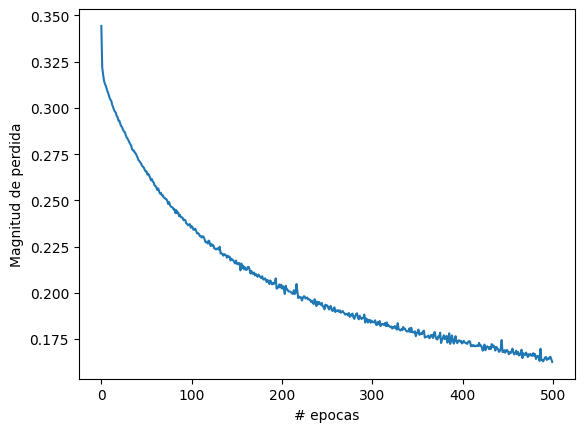

In [165]:
plt.xlabel("# epocas")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [166]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_test)


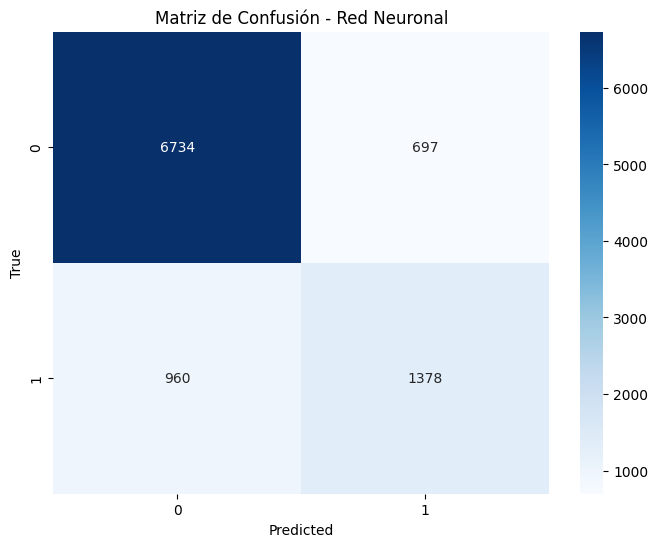

In [167]:
# Gráfica de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión - Red Neuronal')
plt.show()

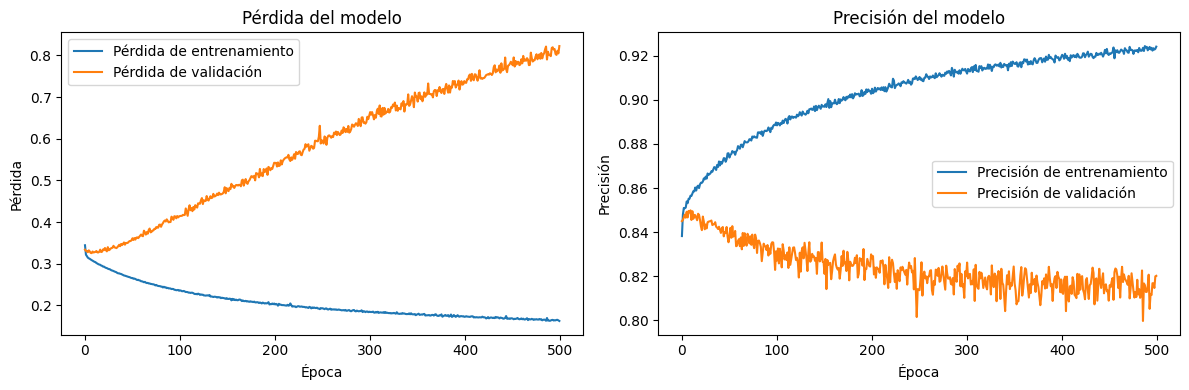

In [168]:
# Gráficas de pérdida y precisión durante el entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(historial.history['loss'], label='Pérdida de entrenamiento')
plt.plot(historial.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida del modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(historial.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión del modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

In [169]:
#cargar el modelo 
pkl_filename="pickle_model.plk"
with open(pkl_filename, 'wb')as file:
    pickle.dump(historial,file)